# 1. Clasificación Binaria

## Clasificación por nivel de experiencia

### 1. La variable 'experience_level' clasifica a los empleados en:
   
- EN: Entry-level (nivel de entrada)
- MI: Mid-level (nivel medio)
- SE: Seniorv (mas que medio)
- EX: Executive (alta dirección)

### 2. Clasificación binaria:

Grupo 0: EN y MI → poca o mediana experiencia
Grupo 1: SE y EX → mucha experiencia

### 3. ¿Para qué sirve?
   
Este modelo permite predecir si un perfil es de alta experiencia, basándose en variables como:
- employment_type (tipo de contrato)
- job_title o job_group (tipo de cargo)
- company_size (tamaño de empresa)
- remote_ratio o is_remote (nivel de trabajo remoto)
- company_location y employee_residence (ubicación)
- salary_in_usd 
  
### 4. Aplicación real:
- Sistemas de recomendación de empleo
- Clasificación automática de candidatos por experiencia

### ✅ Tipos de datos con los que funciona mejor la regresión logística

#### 1. Variables predictoras numéricas (escaladas)

Ejemplos: edad, ingresos, años de experiencia, calificaciones

Por qué funcionan bien: la regresión logística modela una función lineal sobre estas variables; si están escaladas, el modelo converge más rápido y es más estable.

#### 2. Variables categóricas (codificadas en One-Hot o similar)

Ejemplos: tipo de contrato, sector, ubicación, tamaño de empresa

-  Importante: deben estar codificadas en valores numéricos. Lo ideal es usar:

- OneHotEncoder para variables sin orden lógico

- OrdinalEncoder si hay un orden entre las categorías

#### 3. Variables sin multicolinealidad alta
Si hay alta correlación entre variables, el modelo puede volverse inestable. Se recomienda eliminar o combinar variables redundantes.

#### 4. Datos sin muchos valores atípicos extremos
Valores extremos pueden afectar negativamente los coeficientes. Puede ser útil usar transformaciones como logaritmos o aplicar técnicas de detección de outliers.

**⚠️ Evitar usar con...**
Relaciones no lineales complejas: la regresión logística no captura bien patrones no lineales (usa modelos como árboles, redes o SVM en ese caso).

Variables con muchas clases en categóricas: pueden generar demasiadas columnas si haces One-Hot, volviendo el modelo más complejo e ineficiente.

**🎯 Recomendaciones prácticas**
* Escala los datos numéricos: con StandardScaler o MinMaxScaler.
* Codifica los datos categóricos: con OneHotEncoder o similar.
* Evita multicolinealidad: con df.corr() o VIF para detectar redundancia.
* Normaliza la variable objetivo: debe ser binaria (0/1) para regresión logística clásica.




## 1. Importar librerías

In [17]:
#visualizacion
import seaborn as sns
import matplotlib.pyplot as plt
#data
import pandas as pd
import numpy as np
#machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder as le
from sklearn.utils.multiclass import unique_labels
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# almacenar modelos
import joblib

import warnings
# Desactivar todos los warnings
warnings.filterwarnings("ignore")


## 2. Data 
*Para este contexto se utilizara la data preprocesada 3*

In [18]:
data= pd.read_csv(r"C:\Users\darly\OneDrive\Escritorio\IA_explorer2\dataSet\data_preprocesada_3.csv")

*Añadir la columna que se quiere predecir, transformarla a etiquetas binarias*

In [6]:
data["experience_group"] = data["experience_level"].map({"EN": 0, "MI": 0, "SE": 1, "EX": 1})

In [7]:
data

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_title_clean,employee_residence_clean,company_location_clean,log_salary_usd,remote_type,experience_group
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Data Scientist,DE,DE,11.287705,Presencial,0
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Other,Other,Other,12.468441,Presencial,1
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Other,GB,GB,11.599332,Híbrido,1
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Other,Other,Other,9.903538,Presencial,0
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,Machine Learning Engineer,US,US,11.918397,Híbrido,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,Data Engineer,US,US,11.944714,Remoto Total,1
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,Data Engineer,US,US,11.744045,Remoto Total,1
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,Data Analyst,US,US,11.767575,Presencial,1
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,Data Analyst,US,US,11.918397,Remoto Total,1


*Revisar el balance de las clases*

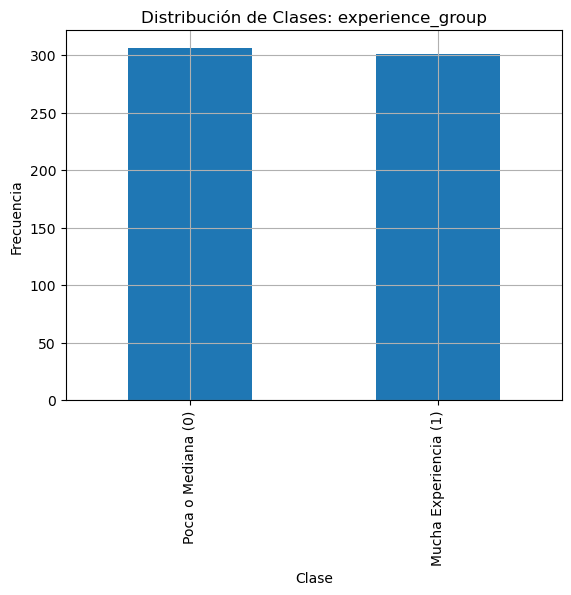

Conteo por clase:
 experience_group
1    306
0    301
Name: count, dtype: int64

Proporciones:
 experience_group
1    0.504119
0    0.495881
Name: proportion, dtype: float64


In [19]:
# Revisar el balance de clases

# Conteo de clases
data["experience_group"].value_counts().plot(kind='bar')
plt.title("Distribución de Clases: experience_group")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.xticks(ticks=[0, 1], labels=["Poca o Mediana (0)", "Mucha Experiencia (1)"])
plt.grid(True)
plt.show()

# imprimir los valores absolutos y proporciones
print("Conteo por clase:\n", data["experience_group"].value_counts())
print("\nProporciones:\n", data["experience_group"].value_counts(normalize=True))


## 3. Transformar, modelar

*Seleccionar caracteristicas*

In [21]:
features = ["work_year", "remote_ratio", "salary_in_usd"]
X = data[features]
y = data["experience_group"]

*Transformar datos*  **--> normalizarlos**

In [35]:
preprocessor = make_column_transformer((StandardScaler(), features))

*Aplicar tUberias*

In [36]:
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),           # Escalado y codificación
    ("classifier", LogisticRegression())      # Modelo
])

*partir datos*

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*entrenar la tuberia y predecir*

In [40]:
# Entrenar el modelo
pipeline.fit(X_train, y_train)
    
# predecir
y_pred = pipeline.predict(X_test)


## 4. Evaluar modelo

In [43]:
# Evaluación
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Matriz de Confusión:\n", conf_matrix)
print("\nReporte de Clasificación:\n", class_report)
print("\nExactitud del modelo:", accuracy)

Matriz de Confusión:
 [[49 14]
 [17 42]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.74      0.78      0.76        63
           1       0.75      0.71      0.73        59

    accuracy                           0.75       122
   macro avg       0.75      0.74      0.75       122
weighted avg       0.75      0.75      0.75       122


Exactitud del modelo: 0.7459016393442623


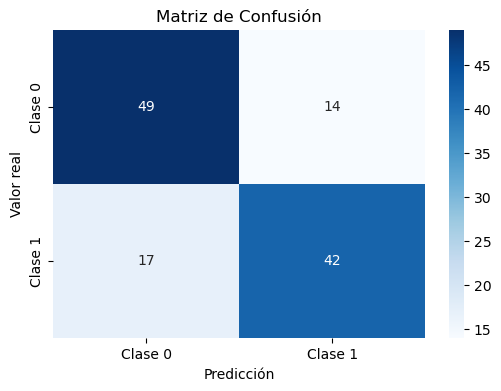

In [42]:

# Graficar
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión")
plt.show()


## 5. Almacenar modelo  de clasificación

In [47]:
joblib.dump(pipeline, r"C:/Users/darly/OneDrive/Escritorio/IA_explorer2/claseFIN5/modelos_data3/clasificacionBinaria.pkl")

['C:/Users/darly/OneDrive/Escritorio/IA_explorer2/claseFIN5/modelos_data3/clasificacionBinaria.pkl']

# 2. Clasificación Multiclase

**Vamos a aplicar KNN, SVM, RFC**

In [22]:
df= pd.read_csv(r"C:\Users\darly\OneDrive\Escritorio\IA_explorer2\dataSet\data_preprocesada_3.csv")

In [23]:
# Calcular los valores de los percentiles
percentile_values = df['salary_in_usd'].quantile([0, 0.33, 0.66, 1.0]).values

# Etiquetas para las clases
labels = ['bajo', 'medio', 'alto']


# Clasificar el salario en clases usando los percentiles
df['salary_class'] = pd.cut(
    df['salary_in_usd'],
    bins=percentile_values,
    labels=labels,
    include_lowest=True,
    duplicates='drop'  # evita errores si dos percentiles tienen el mismo valor
)

In [6]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_title_clean,employee_residence_clean,company_location_clean,log_salary_usd,remote_type,salary_class
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Data Scientist,DE,DE,11.287705,Presencial,medio
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Other,Other,Other,12.468441,Presencial,alto
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Other,GB,GB,11.599332,Híbrido,medio
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Other,Other,Other,9.903538,Presencial,bajo
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,Machine Learning Engineer,US,US,11.918397,Híbrido,alto


In [24]:
# transformar a labelEncoder
le = LabelEncoder()
df['salary_class'] = le.fit_transform(df['salary_class'])  # ahora y tendrá valores 0= alto, 1= bajo 2= medio
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_title_clean,employee_residence_clean,company_location_clean,log_salary_usd,remote_type,salary_class
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Data Scientist,DE,DE,11.287705,Presencial,2
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Other,Other,Other,12.468441,Presencial,0
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Other,GB,GB,11.599332,Híbrido,2
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Other,Other,Other,9.903538,Presencial,1
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,Machine Learning Engineer,US,US,11.918397,Híbrido,0


In [26]:
#almacenar la data 
# Guardar las predicciones junto con las etiquetas reales en un archivo CSV
df.to_csv(r"C:\Users\darly\OneDrive\Escritorio\IA_explorer2\dataSet\data_preprocesada_4.csv", index=False)


In [26]:
# Variables independientes (X) y dependiente (y)

X = df[[
    "work_year", "experience_level", "employment_type",
    "job_title_clean", "salary_currency", "employee_residence_clean",
    "company_location_clean", "company_size", "remote_type"]]

y = df['salary_class']

cat_cols = [
    "experience_level", "employment_type", "job_title_clean","salary_currency", 
    "employee_residence_clean", "company_location_clean", "company_size", "remote_type"
]
num_cols = ["work_year"]

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Preprocesamiento
preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", drop="first"), cat_cols),
    #(StandardScaler(), num_cols)
)



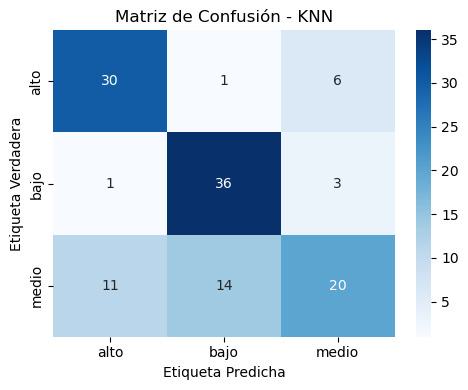

=== KNN ===
Reporte de Clasificación:
              precision    recall  f1-score   support

        alto       0.71      0.81      0.76        37
        bajo       0.71      0.90      0.79        40
       medio       0.69      0.44      0.54        45

    accuracy                           0.70       122
   macro avg       0.70      0.72      0.70       122
weighted avg       0.70      0.70      0.69       122




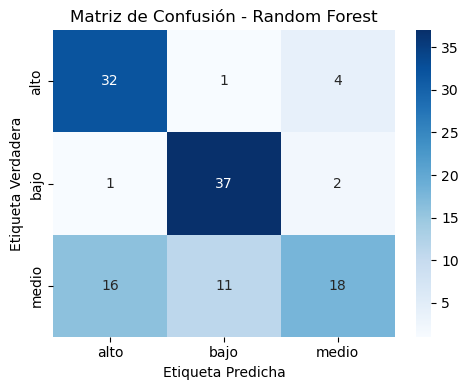

=== Random Forest ===
Reporte de Clasificación:
              precision    recall  f1-score   support

        alto       0.65      0.86      0.74        37
        bajo       0.76      0.93      0.83        40
       medio       0.75      0.40      0.52        45

    accuracy                           0.71       122
   macro avg       0.72      0.73      0.70       122
weighted avg       0.72      0.71      0.69       122




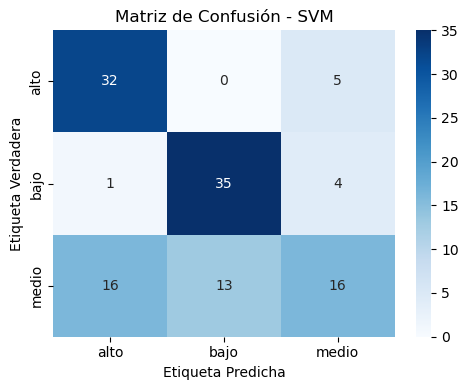

=== SVM ===
Reporte de Clasificación:
              precision    recall  f1-score   support

        alto       0.65      0.86      0.74        37
        bajo       0.73      0.88      0.80        40
       medio       0.64      0.36      0.46        45

    accuracy                           0.68       122
   macro avg       0.67      0.70      0.67       122
weighted avg       0.67      0.68      0.66       122




In [56]:
# Modelos
modelos = {
    'KNN': KNeighborsClassifier(n_neighbors=9,weights ='distance'),
    'Random Forest': RandomForestClassifier(n_estimators=50, max_depth=6, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42)
}

# Entrenar, predecir y evaluar
for nombre, modelo in modelos.items():



    pipeline = Pipeline(steps=[("preprocessor", preprocessor),(nombre,modelo)])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    #almacenar pipeline 
    joblib.dump(pipeline, r"C:/Users/darly/OneDrive/Escritorio/IA_explorer2/claseFIN5/modelos_data3/" + nombre + ".pkl")
    
    etiquetas_presentes = unique_labels(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred, labels=etiquetas_presentes)
    etiquetas_texto = le.inverse_transform(etiquetas_presentes)

    # Matriz de confusión
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=etiquetas_texto,
                yticklabels=etiquetas_texto)
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Verdadera')
    plt.tight_layout()
    plt.show()

    # Resultados
    print(f"=== {nombre} ===")
    print("Reporte de Clasificación:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    print("=" * 40 + "\n")


# 3. Cargar modelos multiclase y probarlos 

 ## 3.1 cargar modelos

In [57]:
# Lista de los nombres de los modelos guardados
modelos_nombres = ['KNN', 'Random Forest', 'SVM']

# Crear un diccionario para almacenar los modelos cargados
modelos_cargados = {}

# Cargar cada modelo usando un bucle
for nombre in modelos_nombres:
    # Cargar el modelo de su archivo correspondiente
    modelo_cargado = joblib.load(r"C:/Users/darly/OneDrive/Escritorio/IA_explorer2/claseFIN5/modelos_data3/"+nombre+".pkl")
    print(modelo_cargado)
    print("________________________________________")
    # Almacenar el modelo cargado en el diccionario
    modelos_cargados[nombre] = modelo_cargado
    

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['experience_level',
                                                   'employment_type',
                                                   'job_title_clean',
                                                   'salary_currency',
                                                   'employee_residence_clean',
                                                   'company_location_clean',
                                                   'company_size',
                                                   'remote_type'])])),
                ('KNN',
                 KNeighborsClassifier(n_neighbors=9, weights='distance'))])
________________________________________
Pipeline(steps=[

In [58]:
modelos_cargados

{'KNN': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('onehotencoder',
                                                   OneHotEncoder(drop='first',
                                                                 handle_unknown='ignore'),
                                                   ['experience_level',
                                                    'employment_type',
                                                    'job_title_clean',
                                                    'salary_currency',
                                                    'employee_residence_clean',
                                                    'company_location_clean',
                                                    'company_size',
                                                    'remote_type'])])),
                 ('KNN',
                  KNeighborsClassifier(n_neighbors=9, weights='distance'))]),
 'Random Forest': Pipeline(steps=[(

## 3.2 abrir data

In [40]:
df= pd.read_csv(r"C:\Users\darly\OneDrive\Escritorio\IA_explorer2\dataSet\data_preprocesada_4.csv")

# 3.3 Ajustar datos al preprocesamiento 

In [41]:
#como no tenemos datos nuevos vamos a generar una muestra aleatoria de los que ya tenemos 
# Seleccionar un 20% aleatorio de los datos para probar

df_aleatorio = df.sample(frac=0.2, random_state=42)  # Cambia el 'frac' si deseas un porcentaje diferente (0.2 = 20%)


## 3.4 Aplicar tuberia

In [59]:

# Realizar las predicciones con cada modelo cargado
for nombre, modelo_cargado in modelos_cargados.items():
    predicciones = modelo_cargado.predict(df_aleatorio)
    
    # Convertir las predicciones de vuelta a las etiquetas originales
  
    # Inicializar y ajustar el LabelEncoder con las etiquetas originales
    le.fit(["alto", "bajo", "medio"])
    
    # Imprimir los resultados para cada modelo
    print(f"Predicciones con el modelo {nombre}:")
    print(predicciones)
    print("=" * 40)

      
    print(f"Reporte de clasificación para el modelo {nombre}:")
    print(classification_report(df_aleatorio["salary_class"], predicciones, target_names=le.classes_))
    print("=" * 40)

Predicciones con el modelo KNN:
[0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 2 1 0 2 1 0 0 1 1 0 0 2 2 1 2 2 1 1 2 0
 1 1 2 0 0 2 1 2 1 1 2 2 0 2 1 2 2 0 2 0 1 1 1 0 0 1 0 0 2 1 1 1 1 1 1 0 1
 2 0 1 1 2 1 0 2 0 1 0 0 2 0 0 2 1 1 0 2 0 1 1 1 1 0 1 1 0 0 2 1 2 0 2 2 1
 1 0 0 1 1 1 0 0 2 2]
Reporte de clasificación para el modelo KNN:
              precision    recall  f1-score   support

        alto       0.71      0.81      0.76        37
        bajo       0.72      0.90      0.80        40
       medio       0.69      0.45      0.55        44

    accuracy                           0.71       121
   macro avg       0.71      0.72      0.70       121
weighted avg       0.71      0.71      0.70       121

Predicciones con el modelo Random Forest:
[0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 2 1 0 2 1 0 0 1 1 0 2 0 2 1 0 2 1 1 0 2
 2 1 2 0 0 2 1 0 1 1 2 2 0 0 1 2 0 0 0 0 1 1 1 0 1 1 0 0 2 1 1 2 1 1 1 0 2
 2 0 1 1 2 1 0 0 0 1 0 0 2 0 2 1 1 1 2 2 0 1 1 1 1 0 1 1 0 0 0 2 0 0 0 1 1
 1 0 0 1 1 1 0 0 2 0]
Report